
# Project: Investigate a Dataset - TMBD Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project will involve an in-depth analysis of data describing 100k movies collected from The Movie Database (TMDB). 

In this analysis we are focusing on the relationship between average vote, movie runtime and release year.

The questions we would like to know about this data are:
1. Does the runtime of the movie have an effect on the vote average?
2. How has movie runtime changed over the years?
3. How has vote average changed over the years?

<a id='wrangling'></a>
## Data Wrangling

In this section we will load the csv file into our report, import packages so that we can access tools to analyze the data, investigate the data on a high level to gather context, check the data for cleanliness, and trim the data.

### Importing packages and loading data

In [1]:
# Import packages to use for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load csv file

df = pd.read_csv('tmdb-movies.csv')

***

### Reviewing the data on a high level to gain context

In [3]:
# Examine the size of the data set. 
df.shape

(10866, 21)

##### There are 10866 rows and 21 columns
***

 

In [4]:
# Gather more information about the columns and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Of the 21 columns, 4 are floats, 6 are integers and 11 are strings. The titles of the columns and the spacing delimiters of the columns are correct and consistant.

***

In [5]:
#View snippet of data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Cleaning Data

In [6]:
# Checking how many cells of each column are missing data

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Checking how many cells are unique in each column

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

##### We can see here that the best column to use as a primary key is the id column. There is only one cell that is duplicated which we will inspect below. 

In [8]:
# View duplicated id row

df[df.duplicated(subset = 'id', keep =False)].sort_values('id')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
# These row do appear to be identical, so we will drop row with index number 2090
df = df.drop(df.index[2089])

***

##### Because we have determined to use the id as a primary key, we can drop the imdb_id and the original_title

In [10]:
# Drop columns imbd_id and original_title

df = df.drop(labels=['imdb_id', 'original_title'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   cast                  10789 non-null  object 
 5   homepage              2936 non-null   object 
 6   director              10821 non-null  object 
 7   tagline               8041 non-null   object 
 8   keywords              9372 non-null   object 
 9   overview              10861 non-null  object 
 10  runtime               10865 non-null  int64  
 11  genres                10842 non-null  object 
 12  production_companies  9835 non-null   object 
 13  release_date          10865 non-null  object 
 14  vote_count            10865 non-null  int64  
 15  vote_average       

***

##### The columns with qualitative data missing that we will not be using for analysis are cast, genres and production companies, overview, homepage, keywords and tagline. We will drop those below

In [11]:
# Drop not applicable qualitative columns
df = df.drop(labels=['cast', 'genres', 'production_companies', 'overview', 'homepage', 'keywords', 'tagline', 'director'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   popularity    10865 non-null  float64
 2   budget        10865 non-null  int64  
 3   revenue       10865 non-null  int64  
 4   runtime       10865 non-null  int64  
 5   release_date  10865 non-null  object 
 6   vote_count    10865 non-null  int64  
 7   vote_average  10865 non-null  float64
 8   release_year  10865 non-null  int64  
 9   budget_adj    10865 non-null  float64
 10  revenue_adj   10865 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1018.6+ KB


In [12]:
# Excellent, lets take a peek at our data now

df.head(20)

,id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,156,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,125,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,141,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,91,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,94,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


***

##### Because we are comparing data from many decades, the budget and revenue including inflation are the best columns to use when examining finances. We will drop 'budget' and 'revenue' and keep 'budget_adj' and 'revenue_adj'. 

In [13]:
# Drop budget and revenue columns

df = df.drop(labels=['revenue', 'budget'], axis=1)
df.head()

,id,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


***

##### Checking data for mistypes or 0 values

In [14]:
# Statistical data 

df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### The columns 'runtime', 'budget_adj' and 'revenue_adj' have zero values as their minimum when this is unlikely to be accurate. 

In [15]:
#Create a function that counts how many 0 values are in a column

def count_zero(column):
    count = (df[column] == 0).sum()
    return count

In [16]:
# Check count of runtime that are 0

count_zero('runtime')

31

In [17]:
# Drop runtimes of 0 
df.drop(df[df['runtime'] == 0].index, inplace = True)

##### Runtime isn't missing too many, so we will drop the rows with a 0 value
***

In [18]:
# Check count of budget_adj that are 0

count_zero('budget_adj')

5668

In [19]:
# Check count of revenue_adj that are 0

count_zero('revenue_adj')

5985

##### That is more than half of the data with zero values in buget_adj and revenue_adj. Unfortunantly this is not usable data. We will drop these columns below

In [21]:
# Drop revenue_adj and budget_adj

df = df.drop(labels=['revenue_adj', 'budget_adj'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10834 non-null  int64  
 1   popularity    10834 non-null  float64
 2   runtime       10834 non-null  int64  
 3   release_date  10834 non-null  object 
 4   vote_count    10834 non-null  int64  
 5   vote_average  10834 non-null  float64
 6   release_year  10834 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 677.1+ KB


***

##### Next, we will extract the release month and drop the release date for more broad data.

In [22]:
# Extracting the release month and dropping the release date

# Extract the month from each date and create a new 'month' column
df['release_month'] = pd.to_datetime(df['release_date']).dt.month


df.head()

,id,popularity,runtime,release_date,vote_count,vote_average,release_year,release_month
0,135397,32.985763,124,6/9/15,5562,6.5,2015,6
1,76341,28.419936,120,5/13/15,6185,7.1,2015,5
2,262500,13.112507,119,3/18/15,2480,6.3,2015,3
3,140607,11.173104,136,12/15/15,5292,7.5,2015,12
4,168259,9.335014,137,4/1/15,2947,7.3,2015,4


***

In [23]:
# Checking statistics of data and table before completing the cleaning portion
df.describe()


,id,popularity,runtime,vote_count,vote_average,release_year,release_month
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,65750.128854,0.647762,102.363855,217.962064,5.976343,2001.295274,6.829334
std,91819.986178,1.001204,30.948225,576.370933,0.935047,12.819708,3.440832
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,1.000000
25%,10586.250000,0.208536,90.000000,17.000000,5.400000,1995.000000,4.000000
50%,20551.000000,0.384690,99.000000,38.000000,6.000000,2006.000000,7.000000
75%,75055.000000,0.715448,112.000000,146.000000,6.600000,2011.000000,10.000000
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,12.000000


In [24]:
df.head()

,id,popularity,runtime,release_date,vote_count,vote_average,release_year,release_month
0,135397,32.985763,124,6/9/15,5562,6.5,2015,6
1,76341,28.419936,120,5/13/15,6185,7.1,2015,5
2,262500,13.112507,119,3/18/15,2480,6.3,2015,3
3,140607,11.173104,136,12/15/15,5292,7.5,2015,12
4,168259,9.335014,137,4/1/15,2947,7.3,2015,4


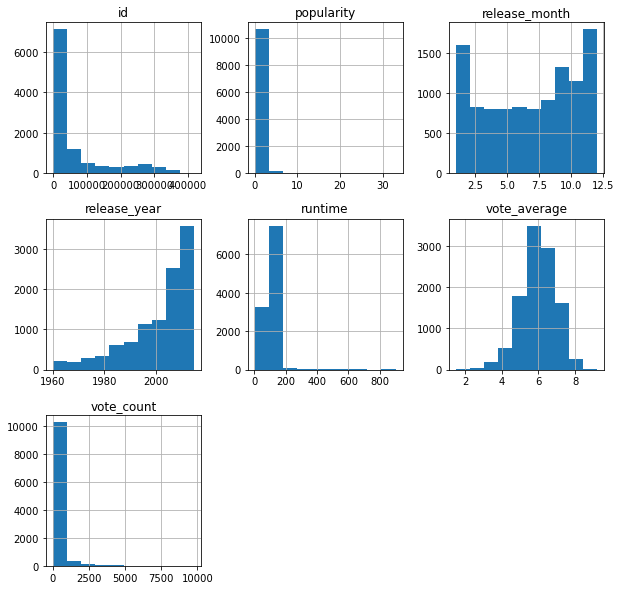

In [25]:
# Looking at general histograms to make sure there isnt anything alarming lurking in the data
df.hist(figsize =(10, 10));

##### Great, I am happy with this data, it's structure and cleanliness. 

We were able to keep 10834 rows of data out of 10866
***

<a id='eda'></a>
## Exploratory Data Analysis


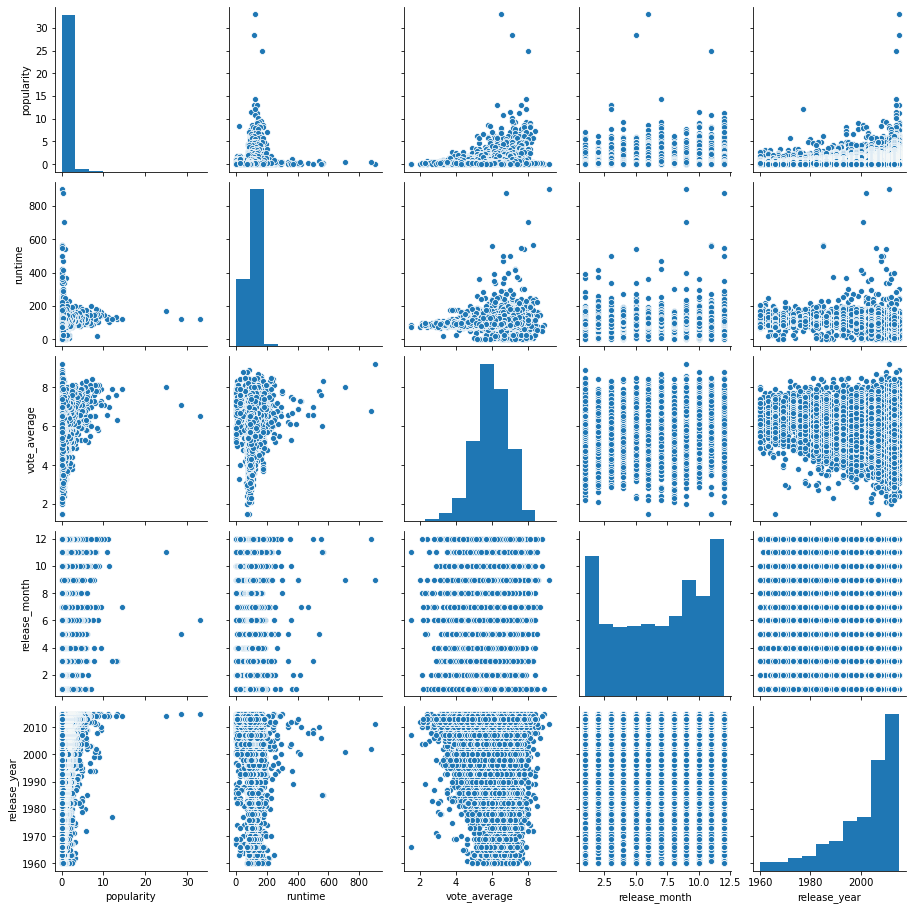

In [27]:
# Comparing all numerical variables for a general idea of relationship
sns.pairplot(df, vars=df.columns[2:]);

### Question 1. Does the runtime of the movie have an effect on the vote average?

In [28]:
#Function to create bubble plot comparing the average x per y and its corresponding counts

def scatter_plot_avg(x, y, x_range=None):
    # Calculate average x per y and its corresponding counts
    x_counts = df.groupby(x)[x].count()
    average_y_per_x = df.groupby(x)[y].mean()

    # Create a bubble chart
    plt.figure(figsize=(10, 6))

    # Create range of x values
    if x_range is not None:
        plt.xlim(x_range[0], x_range[1])

    # Scale bubble size based on count of x-values
    bubble_sizes = x_counts.values * 50

    plt.scatter(average_y_per_x.index, average_y_per_x.values, s=bubble_sizes, alpha=0.7)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Average ' + y + ' vs. ' + x)
    plt.grid(True)
    plt.show()

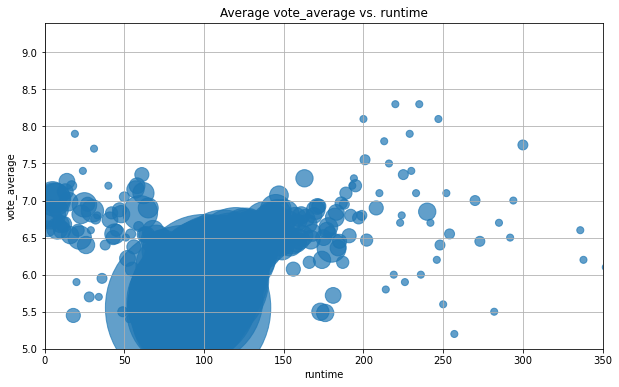

In [29]:
#Using function to create a bubble chart to see where higher votes lie compared to runtime.

scatter_plot_avg('runtime', 'vote_average', [0,350])

##### This chart shows that movies with a runtime between 200 and 250 minutes are more likely to have a higher rating
***

### Question 2. How has runtime changed over the years?

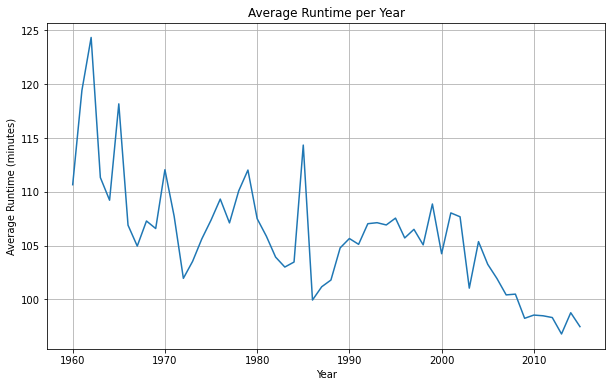

In [30]:
#Calculate average runtime per year
average_runtime_per_year = df.groupby(df['release_year'])['runtime'].mean()

#Create a linechart
plt.figure(figsize=(10, 6))
plt.plot(average_runtime_per_year.index, average_runtime_per_year.values)
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime per Year')
plt.grid(True)

##### This chart very clearly shows that the average runtime of movies is decreasing overtime
***

### Question 3. How has vote average changed over the years?

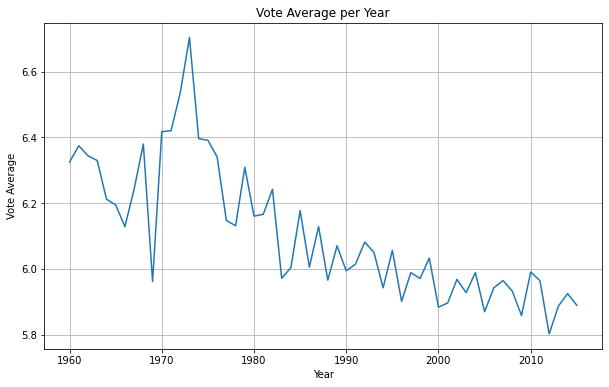

In [31]:
#Calculate average rating per year
average_runtime_per_year = df.groupby(df['release_year'])['vote_average'].mean()

#Create a linechart
plt.figure(figsize=(10, 6))
plt.plot(average_runtime_per_year.index, average_runtime_per_year.values)
plt.xlabel('Year')
plt.ylabel('Vote Average')
plt.title('Vote Average per Year')
plt.grid(True)

#### As seen in this chart, the average vote has decreased over the years.

<a id='conclusions'></a>
## Conclusions

From our analysis, we have discovered that movie runtimes between 200 and 250 minutes are voted higher than longer and shorter ones. We also discovered that the average runtime of movies has decreased over the years. This suggests that as time goes on, our attention span lessons. Furthermore, we discovered that the average vote per year is decreasing each decade. This cooresponds with our other findings. The biggest limitation with our data is that so many attributes were missing data. It would have been nice to look further into these, but most of them were missing over 50% of the data, most importantly those including financial information. 